In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

#Import Packages for Model Validation
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import warnings
import statsmodels.api as sm
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df1 = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/MLDataset/train-ml.csv")
data = pd.DataFrame(df1.loc[ : , 'pixel0':'pixel783'])
target = pd.DataFrame(df1.loc[ : , ['label']])

data = data.to_numpy()
print(data)
target = target.to_numpy()
print(target)


[[125 117 111 ... 252 251 253]
 [ 37  32  24 ...  28  48 126]
 [243 241 230 ...  65  49  55]
 ...
 [127 159 120 ...  46  37  38]
 [ 98  96  96 ...  37  33  27]
 [102  77 104 ...  61  56  35]]
[['face']
 ['face']
 ['face']
 ...
 ['masked']
 ['masked']
 ['masked']]


In [9]:
f_target = target.flatten()

In [10]:
df2 = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/MLDataset/test-ml.csv")
test_data = pd.DataFrame(df2.loc[ : , 'pixel0':'pixel783'])
test_data = test_data.to_numpy()
target_test = pd.DataFrame(df2.loc[ : , ['label']])
target_test = target_test.to_numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


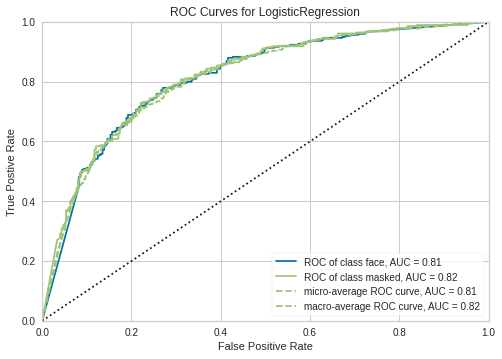

In [11]:
#ROCAUC Curve
from yellowbrick.classifier import ROCAUC

lr_classification = LogisticRegression(max_iter=2000)
lr_visualizer = ROCAUC(lr_classification)
lr_visualizer.fit(data, f_target)
lr_visualizer.score(test_data, target_test)
lr_visualizer.poof()

In [12]:
#Logistic Regression
lr_classification = LogisticRegression(max_iter=2000)
lr_classification.fit(data,f_target)
y_pred = lr_classification.predict(test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7362068965517241


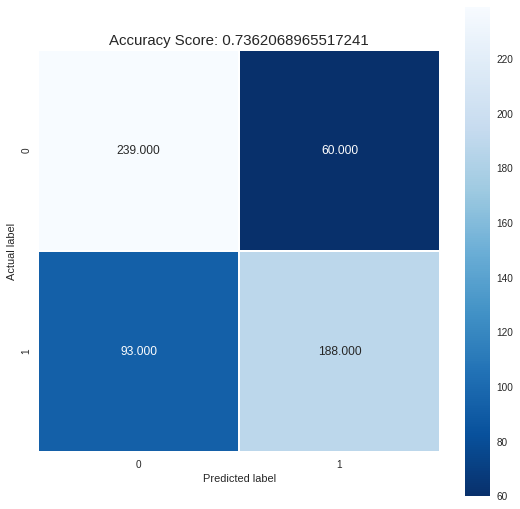

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

score = lr_classification.score(test_data, target_test)
print(score)
cm = confusion_matrix(target_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'Performance of Logistic Regression Model')

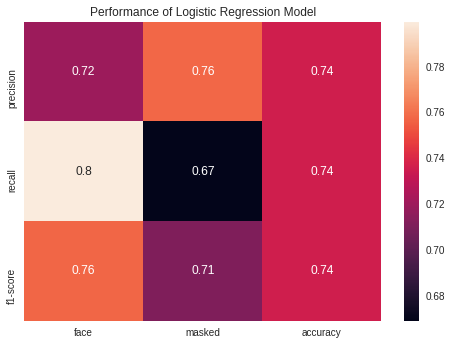

In [19]:
clf_report = classification_report(target_test, y_pred , output_dict=True)
plotmap = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :3], annot=True, linecolor='black')
plt.title("Performance of Logistic Regression Model")

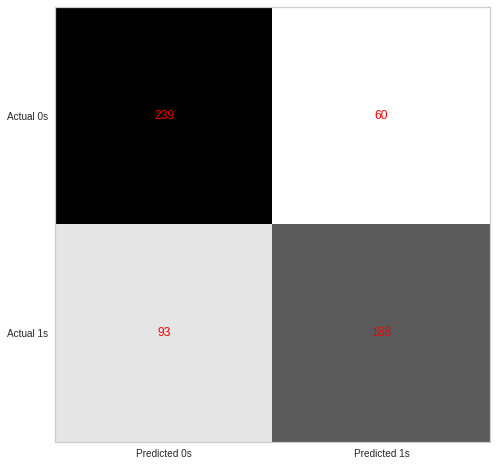

In [15]:
cm = confusion_matrix(target_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [16]:
print(classification_report(target_test,y_pred))

              precision    recall  f1-score   support

        face       0.72      0.80      0.76       299
      masked       0.76      0.67      0.71       281

    accuracy                           0.74       580
   macro avg       0.74      0.73      0.73       580
weighted avg       0.74      0.74      0.73       580



In [17]:

import pickle
# save the model to disk
filename = 'logisticReg_model.sav'
pickle.dump(lr_classification, open(filename, 'wb'))

In [18]:
# load the model from disk
filename = '/content/drive/MyDrive/MACHINE LEARNING/ML MODELS/logisticReg_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))


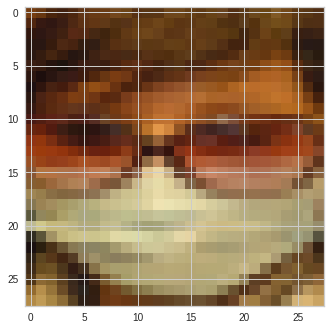

In [ ]:
import numpy as np
from PIL import Image
import cv2

path = '/content/drive/MyDrive/MACHINE LEARNING/ML Dataset/val/AFDB_masked_face_dataset/0_0_0 (10).jpg'
img = np.array(Image.open(path).resize((28, 28)))
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
test_img = imgGray.flatten()
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
y_pred = loaded_model.predict(test_img)

In [ ]:
y_pred

array(['masked'], dtype=object)

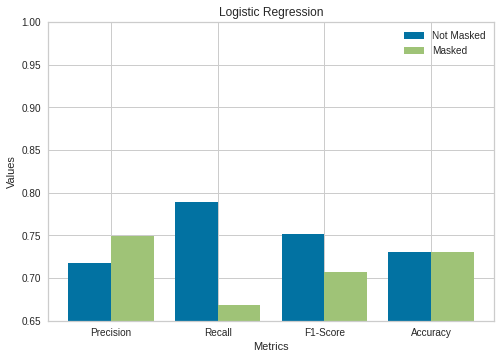

In [ ]:
report_data = classification_report(target_test,y_pred, output_dict=True)
x = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
acc=0
accuracy = 0
y = []
z = []
for key , value in report_data.items():
  acc+=1
  if(acc == 3):
    accuracy = value
    break

  for k , v in value.items():
    if(acc == 1): 
      y.append(v)
    if(acc == 2): 
      z.append(v)
y.pop()
y.append(accuracy)
z.pop()
z.append(accuracy)

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, 0.4, label = 'Not Masked')
plt.bar(x_axis + 0.2, z, 0.4, label = 'Masked')

plt.xticks(x_axis, x)
plt.ylim([0.65,1.0])
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Logistic Regression")
plt.legend()
plt.show()